In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
%matplotlib inline

In [2]:
if 'google.colab' in str(get_ipython()):
  df = pd.read_csv("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/mutagenicity_kNN.csv")
else:
  df = pd.read_csv("references/mutagenicity_kNN.csv")

df

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.30040
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.15720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,5759,5767,20395-16-8,O=C1N(C(=O)N(C(=O)N1CC=C)CC2OC2)CC=C,Training,1,0,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5760,5760,5768,34718-47-3,O=C(C(Br)(Br)Br)Cl,Training,1,1,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5761,5761,5769,43204-63-3,N(CCBr)CCBr,Training,1,1,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5762,5762,5770,52583-35-4,N#Cc2cc(cc(c2(N=Nc1ccc(cc1(NC(=O)C))N(CCOC)CCO...,Training,1,1,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


In [3]:
df.dtypes    

Unnamed: 0               int64
Id                       int64
CAS                     object
SMILES                  object
Status                  object
Experimental value       int64
Predicted value         object
NumValenceElectrons      int64
qed                    float64
TPSA                   float64
MolMR                  float64
BalabanJ               float64
BertzCT                float64
MolWt                  float64
MolLogP                float64
dtype: object

In [4]:
df.head()

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [5]:
first_rows = df.iloc[:4]
first_rows

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897


In [6]:
y_experimental = df['Experimental value']
y_experimental

0       1
1       1
2       0
3       1
4       0
       ..
5759    1
5760    1
5761    1
5762    1
5763    1
Name: Experimental value, Length: 5764, dtype: int64

In [7]:
mutagenic_data = df[df['Experimental value']==1]
mutagenic_data

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
6,6,7,100-13-0,O=[N+]([O-])c1ccc(C=C)cc1,Training,1,0,56,0.477660,43.14,43.1874,3.000887,276.648462,149.149,2.23780
7,7,8,100-14-1,O=[N+]([O-])c1ccc(cc1)CCl,Training,1,1,58,0.389482,43.14,42.6534,2.913802,257.648013,171.583,2.33360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,5759,5767,20395-16-8,O=C1N(C(=O)N(C(=O)N1CC=C)CC2OC2)CC=C,Training,1,0,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5760,5760,5768,34718-47-3,O=C(C(Br)(Br)Br)Cl,Training,1,1,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5761,5761,5769,43204-63-3,N(CCBr)CCBr,Training,1,1,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5762,5762,5770,52583-35-4,N#Cc2cc(cc(c2(N=Nc1ccc(cc1(NC(=O)C))N(CCOC)CCO...,Training,1,1,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


In [8]:
df['Predicted value']

0       1
1       1
2       1
3       0
4       0
       ..
5759    0
5760    1
5761    1
5762    1
5763    0
Name: Predicted value, Length: 5764, dtype: object

In [9]:
df['Predicted value'].drop_duplicates()

0                   1
3                   0
1844    Non Predicted
Name: Predicted value, dtype: object

In [10]:
df[ (df['Predicted value'] != "0") & (df['Predicted value'] != "1") ]

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
1844,1844,1846,16709-86-7,C=C[Si](C)(C)CCl,Training,0,Non Predicted,42,0.401439,0.00,38.399,3.575471,68.480406,134.682,2.19800
2194,2194,2197,2179-59-1,C=CCSSCCC,Training,0,Non Predicted,48,0.333839,0.00,45.404,2.616293,52.490225,148.296,2.96380
4118,4118,4125,624-92-0,CSSC,Training,0,Non Predicted,26,0.452840,0.00,27.030,1.974745,6.000000,94.204,1.62740
4180,4180,4187,6317-18-6,N#CSCSC#N,Training,0,Non Predicted,36,0.321595,47.58,31.275,2.768386,95.083765,130.197,1.37246
5633,5633,5641,7783-54-2,FN(F)F,Training,1,Non Predicted,26,0.383980,3.24,5.163,2.323790,8.000000,71.001,0.94190
5655,5655,5663,676-83-5,CP(Cl)Cl,Training,1,Non Predicted,26,0.426990,0.00,24.550,2.323790,10.754888,116.915,2.40570


In [11]:
non_predicted = df[ (df['Predicted value'] != "0") & (df['Predicted value'] != "1") ].index
df_clean = df.drop(non_predicted)

In [12]:
X = df_clean.drop(['Unnamed: 0', 'Id','CAS','SMILES','Status','Experimental value','Predicted value'],axis=1)
X

,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
2,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.30040
3,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
4,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.15720
...,...,...,...,...,...,...,...,...
5759,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5760,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5761,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5762,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


In [13]:
# Your code here

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
X_hat = scaler.transform(X)
X_hat

array([[-0.82233916, -0.30469594, -0.24799507, ..., -0.73084025,
        -0.72114687, -0.17433149],
       [-0.82233916, -0.93207944,  0.35640473, ..., -0.73613157,
        -0.88855579, -0.72662586],
       [-0.82233916, -0.26173162,  0.221913  , ..., -0.73812874,
        -0.88007765, -0.6630027 ],
       ...,
       [-1.01013559,  0.32808674, -0.97062682, ..., -1.30113579,
        -0.08894773, -0.62928346],
       [ 2.27630201, -1.50462555,  3.06087321, ...,  1.71616346,
         2.10404877,  0.65033598],
       [ 0.0227448 ,  1.33396517, -1.035666  , ..., -0.34979236,
         0.36147962,  1.04843958]])

In [18]:
# Your code here

In [19]:
y = df_clean['Experimental value'].to_numpy()
perc_mutagenic = y.sum()/len(y)*100
print('Percentage of mutagenic molecules    :', perc_mutagenic)
print('Percentage of non-mutagenic molecules:', 100-perc_mutagenic)

Percentage of mutagenic molecules    : 56.42584230635638
Percentage of non-mutagenic molecules: 43.57415769364362


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2, random_state=0)

In [22]:
print('Training points: ', len(y_train))
print('Training points: ', len(y_test))

Training points:  4606
Training points:  1152


In [23]:
# Your code here

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay) 

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[328, 175],
       [140, 509]], dtype=int64)

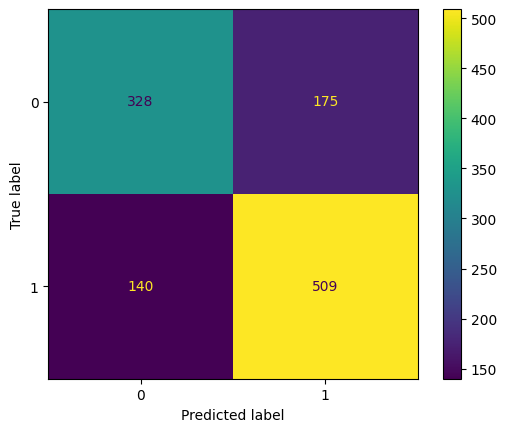

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [31]:
print('{:<10}  {:<15}'.format('Accuracy:', accuracy_score(y_test, y_pred)))
print('{:<10}  {:<15}'.format('Precision:', precision_score(y_test, y_pred)))
print('{:<10}  {:<15}'.format('Recall:', recall_score(y_test, y_pred)))
print('{:<10}  {:<15}'.format('F1:', f1_score(y_test, y_pred)))

Accuracy:   0.7265625      
Precision:  0.7441520467836257
Recall:     0.7842835130970724
F1:         0.7636909227306825


Accuracy:   0.7999305314345259
Precision:  0.8168631006346329
Recall:     0.8319482917820868
F1:         0.8243366880146386


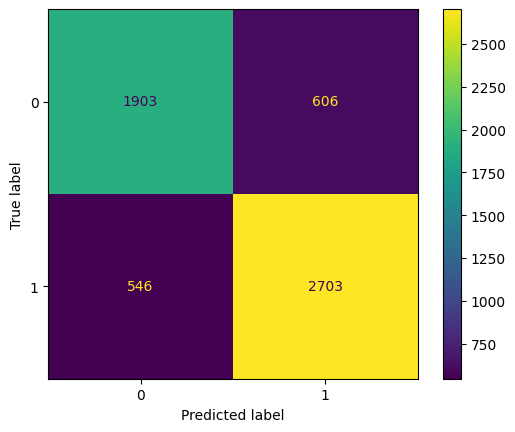

In [32]:
y_clean = df_clean['Experimental value'].astype(int)
y_vega_clean = df_clean['Predicted value'].astype(int)

cm = confusion_matrix(y_clean, y_vega_clean)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('{:<10}  {:<15}'.format('Accuracy:', accuracy_score(y_clean, y_vega_clean)))
print('{:<10}  {:<15}'.format('Precision:', precision_score(y_clean, y_vega_clean)))
print('{:<10}  {:<15}'.format('Recall:', recall_score(y_clean, y_vega_clean)))
print('{:<10}  {:<15}'.format('F1:', f1_score(y_clean, y_vega_clean)))

In [33]:
from sklearn.model_selection import LeaveOneOut

X_clean = df_clean.drop(['Unnamed: 0', 'Id','CAS','SMILES','Status','Experimental value','Predicted value'],axis=1)

loo = LeaveOneOut()
print('Number of folds: ', loo.get_n_splits(X_clean))

Number of folds:  5758


In [34]:
y_pred_loo_our_model = np.zeros(y_clean.shape[0])
for i, (train_index, test_index) in enumerate(loo.split(X_clean)):
  # Get training data for the current fold
  X_train_loo = X_clean.iloc[train_index]
  y_train_loo = y_clean.iloc[train_index]

  # Get test data for the current fold
  X_test_loo = X_clean.iloc[test_index]

  # Train kNN
  # Your code here

  # Get prediction on the test molecule
  # Your code here

  # Store the prediction in `y_pred_loo_our_model`
  # Your code here


Accuracy:   0.4357415769364363
Precision:  0.0            
Recall:     0.0            
F1:         0.0            


C:\Users\DELL\Anaconda3\envs\ML4ChemEng\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


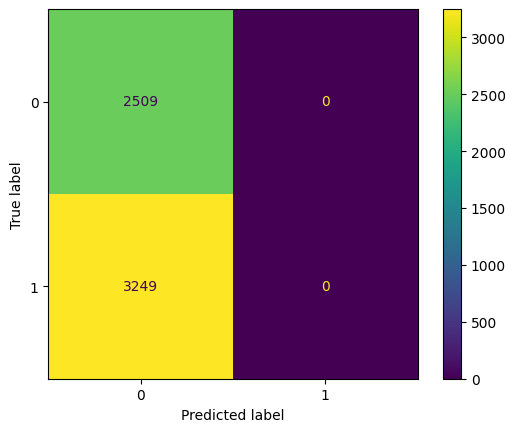

In [35]:
cm = confusion_matrix(y_clean, y_pred_loo_our_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('{:<10}  {:<15}'.format('Accuracy:', accuracy_score(y_clean, y_pred_loo_our_model)))
print('{:<10}  {:<15}'.format('Precision:', precision_score(y_clean, y_pred_loo_our_model)))
print('{:<10}  {:<15}'.format('Recall:', recall_score(y_clean, y_pred_loo_our_model)))
print('{:<10}  {:<15}'.format('F1:', f1_score(y_clean, y_pred_loo_our_model)))

In [36]:
import numpy as np
from tqdm.notebook import tqdm

num_ks = np.arange(1, 100, 2).astype(int)

X_train_hyp, X_valid, y_train_hyp, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

train_accuracy = []
valid_accuracy = []

for i in tqdm(range(len(num_ks))):
  knn = KNeighborsClassifier(n_neighbors=num_ks[i])
  knn.fit(X_train_hyp, y_train_hyp)

  pred_train = knn.predict(X_train_hyp)
  pred_valid  = knn.predict(X_valid)

  train_accuracy.append(1-accuracy_score(y_train_hyp, pred_train))
  valid_accuracy.append(1-accuracy_score(y_valid, pred_valid))

  0%|          | 0/50 [00:00<?, ?it/s]

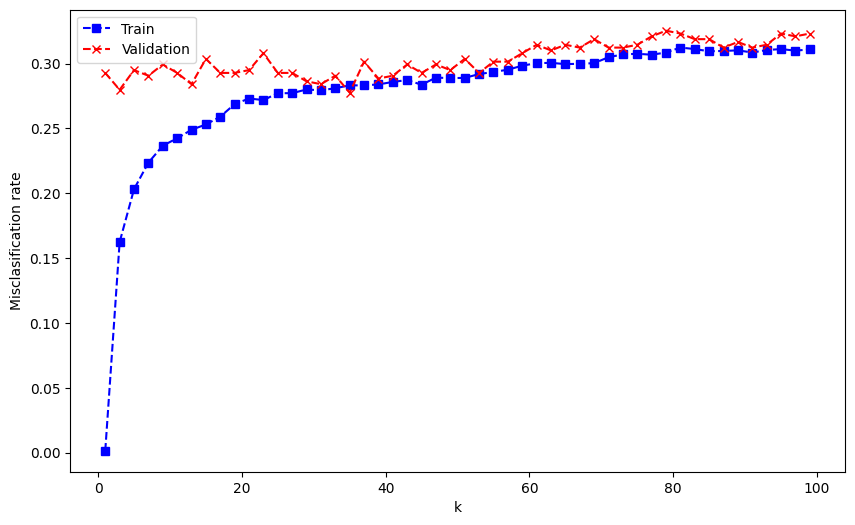

In [37]:
plt.figure(figsize=(10,6))
plt.plot(num_ks, train_accuracy, 'bs--', label='Train')
plt.plot(num_ks, valid_accuracy, 'rx--', label='Validation')
plt.xlabel('k')
plt.ylabel('Misclasification rate')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import cross_validate

In [39]:
num_ks = np.arange(1, 50, 1).astype(int)

train_misclassification = []
valid_misclassification = []
for i in tqdm(range(len(num_ks))):
  knn = KNeighborsClassifier(n_neighbors=num_ks[i])
  cv_dict = cross_validate(knn, X_train, y_train, cv=10, 
                                 scoring='accuracy', return_train_score=True)
  
  k_fold_train_scored = cv_dict['train_score']
  k_fold_valid_scored = cv_dict['test_score']
  
  train_misclassification.append(1-k_fold_train_scored.mean())
  valid_misclassification.append(1-k_fold_valid_scored.mean())
  

  0%|          | 0/49 [00:00<?, ?it/s]

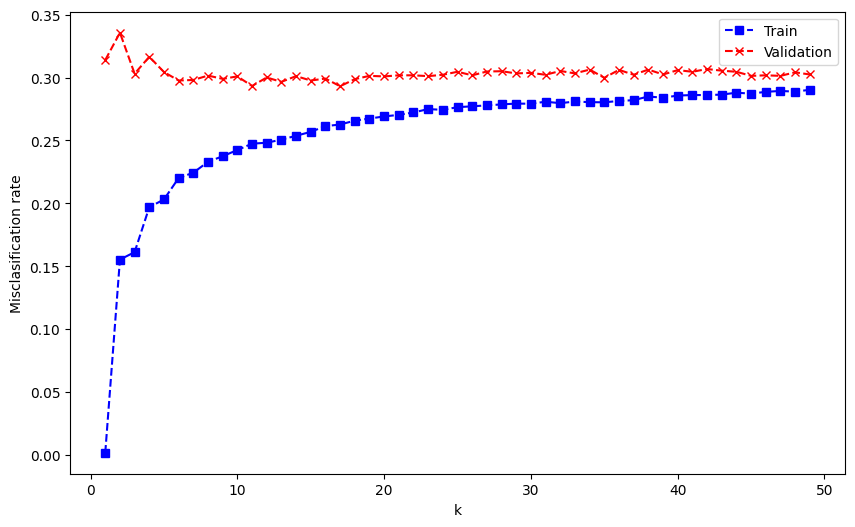

In [40]:
plt.figure(figsize=(10,6))
plt.plot(num_ks, train_misclassification, 'bs--', label='Train')
plt.plot(num_ks, valid_misclassification, 'rx--', label='Validation')
plt.xlabel('k')
plt.ylabel('Misclasification rate')
plt.legend()
plt.show()

In [41]:
print('k with minimum validation misclassification: ', num_ks[np.argmin(valid_misclassification)])

k with minimum validation misclassification:  17


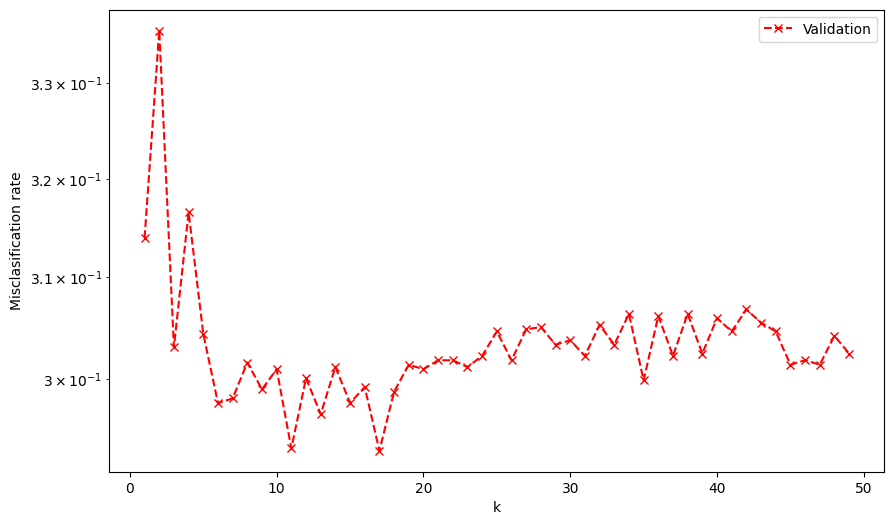

In [42]:
plt.figure(figsize=(10,6))
plt.plot(num_ks, valid_misclassification, 'rx--', label='Validation')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('Misclasification rate')
plt.legend()
plt.show()

In [43]:
if 'google.colab' in str(get_ipython()):
  df_bcf = pd.read_csv("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/BCF_training.csv")
else:
  df_bcf = pd.read_csv("references/BCF_training.csv")


In [44]:
# Your code here